<a href="https://colab.research.google.com/github/aradjabova/dsc-mod-3-project-v2-1-online-ds-ft-120919/blob/master/02_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb




pd.set_option('display.max_columns', None)

# Functions

In [0]:
def confusion_train_test_report(model, x_train_resampled, x_test, y_train_resampled, y_test, name):
  y_train_pred = model.predict(x_train_resampled)
  y_test_pred = model.predict(x_test)
  print_report(y_train_resampled, y_test, y_train_pred, y_test_pred )
  labels = ['Sober', 'Influence', 'Environment']
  cm = confusion_matrix(y_train_resampled, y_train_pred)
  plt.figure(figsize=(10,10))
  sns.heatmap(cm, cmap='Blues', annot=True, fmt='.6g', xticklabels=labels, yticklabels=labels, cbar=False)

  plt.title(name + " Confusion Matrix Training ")

  cm = confusion_matrix(y_test, y_test_pred)
  plt.figure(figsize=(10,10))
  sns.heatmap(cm, cmap='Greens', annot=True, fmt='.6g', xticklabels=labels, yticklabels=labels, cbar=False)
  plt.title(name + "Confusion Matric Test Data")
  plt.show()
  print('_'*60)
 
def violinplot(x, y, title="FIX YOUR TITLE", xlabel="WRITE A X LABEL", ylabel="WRITE A Y LABEL"):
  plt.figure(figsize=(13,8))
  sns.violinplot(df_target['binned_names'], df1['injury/tow_or_no_cat'])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.xticks(rotation=45)
  plt.ylabel(ylabel)
  plt.show()

In [0]:
def plot_features(model_dic, name_feat_from):
    
    x = []
    y = []

    for top in list(range(len(model_dic))):
        keys = list(model_dic.keys())
        values = list(model_dic.values())
        x.append(keys[top])
        y.append(values[top])

    plt.figure(figsize=(5, 8))
    sns.barplot(y,x, )
    plt.title(name_feat_from)
    plt.yticks(rotation=45)
    plt.xticks(rotation=45)
    plt.ylabel("Features")
    plt.xlabel("Features Score")
    plt.show()

In [0]:
def plot_features(model_dic, name_feat_from):
    
    x = []
    y = []

    for top in list(range(len(model_dic))):
        keys = list(model_dic.keys())
        values = list(model_dic.values())
        x.append(keys[top])
        y.append(values[top])

    plt.figure(figsize=(5, 8))
    sns.barplot(y,x, )
    plt.title(name_feat_from)
    plt.yticks(rotation=45)
    plt.xticks(rotation=45)
    plt.ylabel("Features")
    plt.xlabel("Features Score")
    plt.show()

In [0]:
def plot_feature_importances(model, data_train):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


In [0]:
def feature_importance_graph (model, X, name_model):
    feature_score = list(model.feature_importances_)
    features = list(X.columns)

    featured = {}
    for ind in list(range(len(features))):
        featured[features[ind]] = feature_score[ind]

    feature_imp = dict(sorted(featured.items(), key=lambda x: x[1], reverse=True))

    keys = []
    vals = []
    for key, val in feature_imp.items():
        keys.append(key)
        vals.append(val)

    plt.figure(figsize=(5,25))
    plt.grid('dashed')
    sns.barplot( vals[:50], keys[:50])
    plt.title("Feature Importance (Top 50) with" + str(name_model))
    plt.xticks(rotation=90)
    plt.ylabel("Features")
    plt.xlabel("Feature Scores")
    plt.show()


In [0]:
def confision_matrix(model, df, df_target, target='target_names'):
    predicted = model.predict(df)
    cm = confusion_matrix(df_target, predicted)
    sns.heatmap(cm, annot=True)
    plt.show()

In [0]:
def print_report (ytrain, ytest, ytrain_pred, ytest_pred):
    report = classification_report(ytrain, ytrain_pred)
    print("Train Scores \n" + '-'*50)
    accuracy = accuracy_score(ytrain, ytrain_pred)
    print(f"Train Accuracy: {accuracy}")
    report = classification_report(ytrain, ytrain_pred)
    print("Test Scores \n" + '-'*50)
    accuracy1 = accuracy_score(ytest, ytest_pred)
    print(f"Test Accuracy: {accuracy1}")
    avg = (accuracy + accuracy1)/2
    print(f"Average Accuracy: {avg}")


   

# Data Load

In [0]:
cleaned_data_path = "/content/drive/My Drive/Flatiron/Final Projects/Mod 3 Project/"
cleaned_filename = "clean_car_crash.csv"
not_determined_filename = "not_determined.csv"
import os
df = pd.read_csv(os.path.join(cleaned_data_path, cleaned_filename))
not_det = pd.read_csv(os.path.join(cleaned_data_path, not_determined_filename))

In [0]:
df.shape

(206201, 42)

In [0]:
# No nee thse columns for modeling
df = df.drop(['crash_date','sec_contributory_cause', 'street_name' ,'latitude','street_no','beat_of_occurrence', 'longitude' ,'work_zone_type', 'street_direction', 'date_police_notified'], axis=1)


In [0]:
df.shape

(206201, 32)

## Make catergorical columns (cat codes)


In [0]:
# # Remove "object"-type features from df
cont_features = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]

# # Remove "object"-type features from df
df_cont = df.loc[:, cont_features]


In [0]:
# Create df_cat which contains only the categorical variables
features_cat = [col for col in df.columns if df[col].dtype in [np.object]]
other_ind = []
for col in features_cat:
    others = list(df[df[col].str.contains("OTHER")].index)
    for oth in others:
        if oth in other_ind:
            continue
        else: other_ind.append(oth)
    
df.drop(other_ind, inplace=True)
features_cat.remove('target_names')
df_cat = df.loc[:, features_cat]
df_target = df.loc[:, ['target_names']]

In [0]:
df_target["target"] = df_target['target_names'].astype('category')
df_target["target"] = df_target["target"].cat.codes

df = df.drop("target_names", axis=1)

In [0]:
df.shape

(192052, 31)

In [0]:
for feat in features_cat:
    df[feat + "_cat"] = df[feat].astype('category').cat.codes

In [0]:
df1 = df.drop(features_cat, axis=1)

Top 5 most correlated categories with target


- traffic control device
- device_condition
- wether condition
- crash type cat
- intersection related

In [0]:

# # OneHotEncode categorical variables
# ohe = OneHotEncoder(handle_unknown='error')

# # Transform training and test sets
# df_ohe = ohe.fit_transform(df_cat)
# tar_ohe = ohe.fit(df_target)

# # Convert these columns into a DataFrame 
# columns = ohe.get_feature_names(input_features=df_cat.columns)
# # df = pd.DataFrame(df_ohe.todense(), columns=columns)

# df = df.join(df_cont)


In [0]:
# temp = df.join(df_target)
# temp.shape

# Model Building and SelectKBest and SMOTE

## Make BINS for classes/target


In [0]:
label_dict = {}
label_dict['FAILING TO YIELD RIGHT-OF-WAY']= 0
label_dict['FOLLOWING TOO CLOSELY']= 0
label_dict['FAILING TO REDUCE SPEED TO AVOID CRASH']= 0
label_dict['DISREGARDING STOP SIGN']= 0
label_dict['IMPROPER TURNING/NO SIGNAL']=0 
label_dict['IMPROPER BACKING']= 0
label_dict['DRIVING SKILLS/KNOWLEDGE/EXPERIENCE']= 0
label_dict['NOT APPLICABLE']= 0
label_dict['IMPROPER OVERTAKING/PASSING']= 0
label_dict['DISREGARDING TRAFFIC SIGNALS']= 0
label_dict['OPERATING VEHICLE IN ERRATIC-RECKLESS-CARELESS-NEGLIGENT OR AGGRESSIVE MANNER']=0
label_dict['IMPROPER LANE USAGE']=0 
label_dict['EVASIVE ACTION DUE TO ANIMAL-OBJECT-NONMOTORIST']= 2
label_dict['WEATHER']= 2
label_dict['EXCEEDING AUTHORIZED SPEED LIMIT']= 0
label_dict['DRIVING ON WRONG SIDE/WRONG WAY']= 0
label_dict['VISION OBSCURED (SIGNS-TREE LIMBS-BUILDINGS-ETC.)']= 2
label_dict['ROAD ENGINEERING/SURFACE/MARKING DEFECTS']= 2
label_dict['EXCEEDING SAFE SPEED FOR CONDITIONS']= 0
label_dict['EQUIPMENT - VEHICLE CONDITION']= 0
label_dict['PHYSICAL CONDITION OF DRIVER']= 0
label_dict['DISTRACTION - FROM OUTSIDE VEHICLE']= 2
label_dict['DISREGARDING YIELD SIGN']= 0
label_dict['DISTRACTION - FROM INSIDE VEHICLE']= 0
label_dict['UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)']=1 
label_dict['DISREGARDING ROAD MARKINGS']= 0
label_dict['BICYCLE ADVANCING LEGALLY ON RED LIGHT']= 0
label_dict['HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)']= 1
label_dict['RELATED TO BUS STOP']= 0
label_dict['ROAD CONSTRUCTION/MAINTENANCE']= 2
label_dict['TURNING RIGHT ON RED']= 0
label_dict['ANIMAL']= 2
label_dict['TEXTING']= 0
label_dict['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT']= 0
label_dict['PASSING STOPPED SCHOOL BUS']= 0
label_dict['OBSTRUCTED CROSSWALKS']= 0

In [0]:
df_target["target_names"] = df_target["target_names"].str.replace(", ", "-")

In [0]:
df_target["target_labels_binned"] = df_target['target_names'].map(label_dict)

In [0]:
df_target["target_labels_binned"].value_counts()

0    180684
2      9489
1      1879
Name: target_labels_binned, dtype: int64

## Train Test Split

In [0]:
# Create X and y
y = df_target['target_labels_binned']
x =  df1

# Split data into training and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                    test_size = .30)

In [0]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((134436, 31), (57616, 31), (134436,), (57616,))

## SELECTKBEST


In [0]:
best_feats = SelectKBest(score_func=chi2, k=10)

In [0]:
fit = best_feats.fit(x, y)

In [0]:
dfscores = fit.scores_
dfcols = x.columns

# featscore = pd.concat([dfcols, dfscores], axis=1)
# featscore.columns = ['Specs','Score']
# featscore.nlargest(100,'Score')[:12]

featscore = {}
for num in list(range(len(dfcols))):
    featscore[dfcols[num]] = round(dfscores[num], 2)
    
top_12 = {}
for item in sorted(featscore.items(), key=lambda x: x[1], reverse=True)[:15]:
    top_12[item[0]] = item[1]

## Build Models on SMOTE'ed and BIN'ed Data

In [0]:
# Create X and y
y = df_target['target_labels_binned']
x =  df1

# Split data into training and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                    test_size = .30)

In [0]:


# Fit SMOTE to training data
x_train_resampled, y_train_resampled = SMOTE().fit_sample(x_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




2    126464
1    126464
0    126464
dtype: int64


In [0]:
x_train_resampled = pd.DataFrame(x_train_resampled, columns=x.columns)

In [0]:
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()  # TOTOALLY CANNOT DO THIS ON MY COMPUTER
bag_clf = BaggingClassifier()
xgb_clf = xgb.XGBClassifier()


models = [rf_clf, ada_clf, bag_clf, xgb_clf]
names = ["Random Forest", "AdaBoost", "Bagging", "XGBoost"]

In [0]:
ada_clf.fit(x_train_resampled, y_train_resampled)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [0]:
rf_clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
xgb_clf.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
bag_clf.fit(x_train_resampled, y_train_resampled)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [0]:
# Used not RESAMPLED YTRAIN
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
for model in models:
    train_score = model.score(x_train_resampled, y_train_resampled)
    test_score = model.score(x_test, y_test)
    avg_score = (train_score + test_score)/2
    print(model ,train_score, test_score, avg_score)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 0.9998576670040485 0.940329075256873 0.9700933711304608
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 0.8387683451417004 0.8638746181616218 0.8513214816516611
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random

In [0]:

train_score = xgb_clf.score(x_train_resampled, y_train_resampled)
test_score = xgb_clf.score(x_test, y_test)    
avg_score = (train_score + test_score)/2
print(model ,train_score, test_score, avg_score)

# x_train_resampled


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 0.8363381410256411 0.8464315467925576 0.8413848439090994


Train Scores 
--------------------------------------------------
Train Accuracy: 0.9998576670040485
Test Scores 
--------------------------------------------------
Test Accuracy: 0.940329075256873
Average Accuracy: 0.9700933711304608


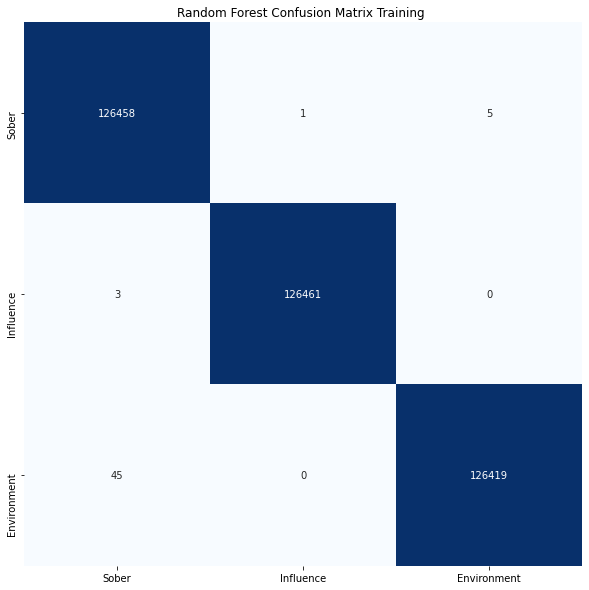

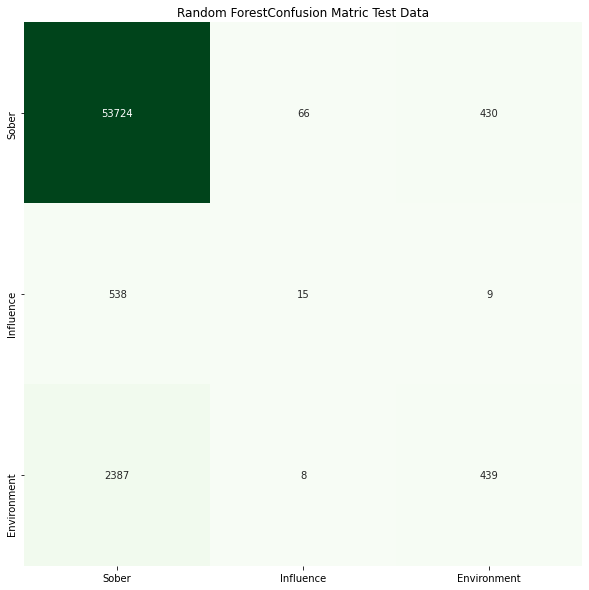

____________________________________________________________
Train Scores 
--------------------------------------------------
Train Accuracy: 0.8387683451417004
Test Scores 
--------------------------------------------------
Test Accuracy: 0.8638746181616218
Average Accuracy: 0.8513214816516611


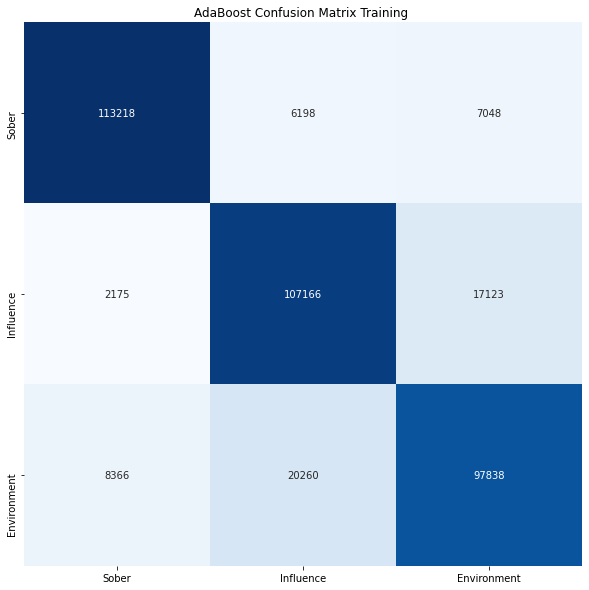

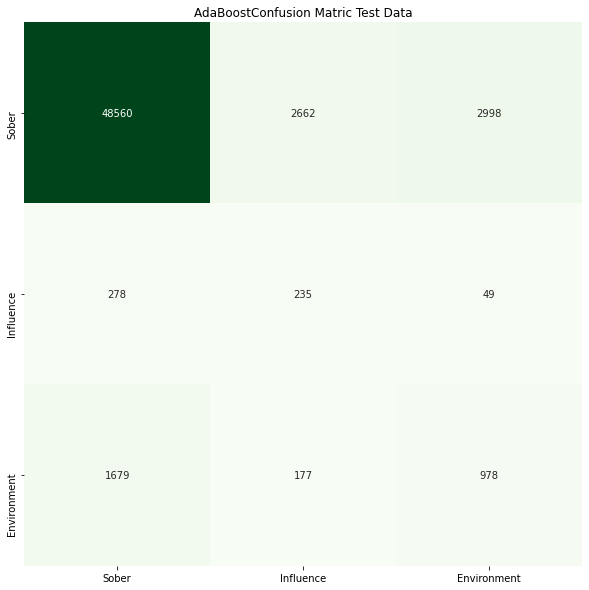

____________________________________________________________
Train Scores 
--------------------------------------------------
Train Accuracy: 0.9968185939608637
Test Scores 
--------------------------------------------------
Test Accuracy: 0.9312690919189114
Average Accuracy: 0.9640438429398875


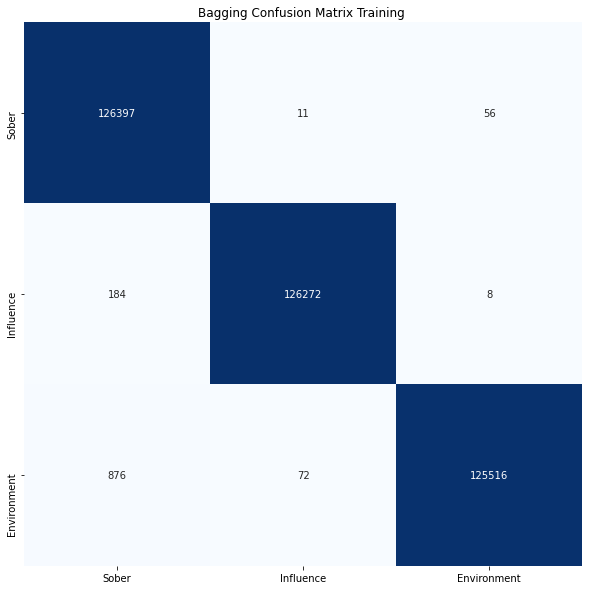

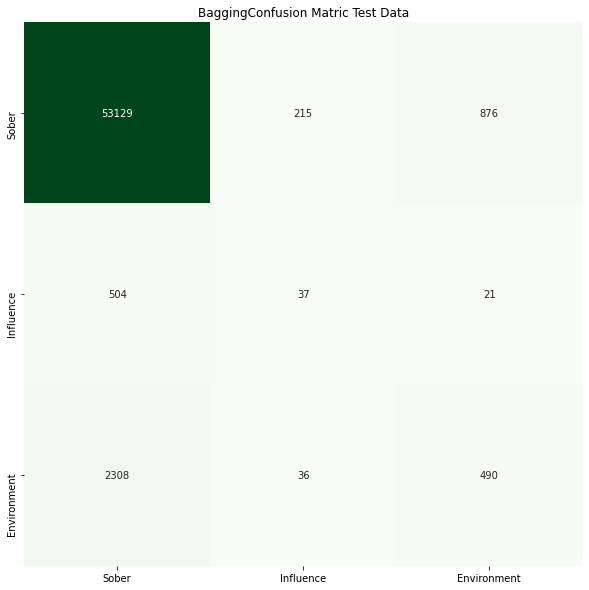

____________________________________________________________
Train Scores 
--------------------------------------------------
Train Accuracy: 0.8363381410256411
Test Scores 
--------------------------------------------------
Test Accuracy: 0.8464315467925576
Average Accuracy: 0.8413848439090994


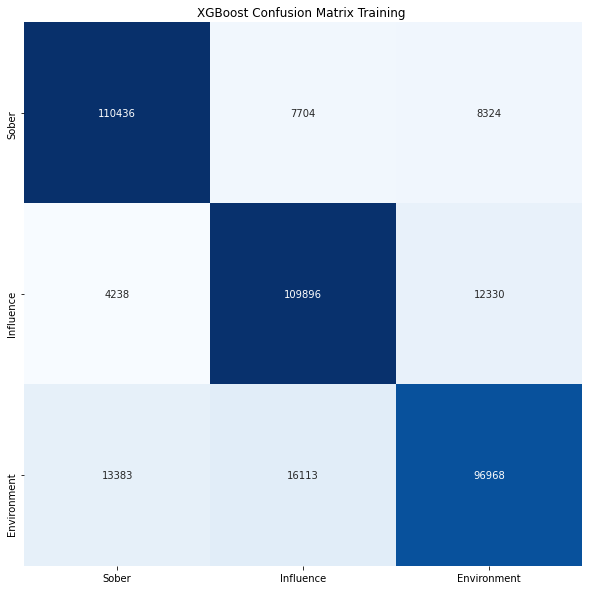

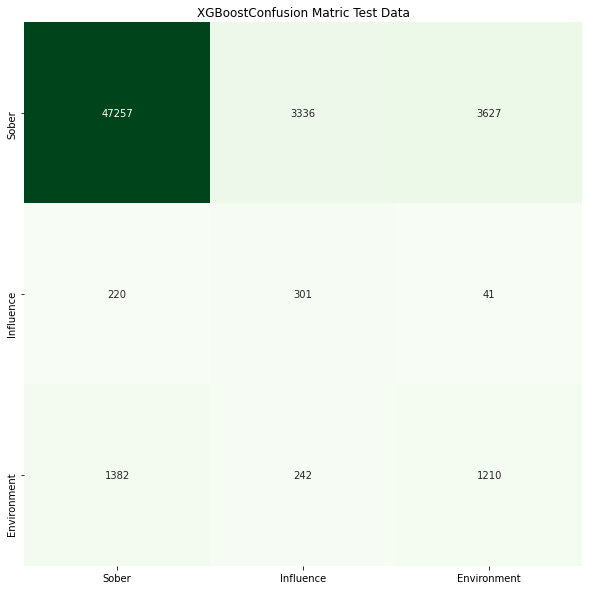

____________________________________________________________


In [0]:
for numb in list(range(0,4)):
  confusion_train_test_report(models[numb], x_train_resampled, x_test, y_train_resampled, y_test, name = str(names[numb]))

Train Scores 
--------------------------------------------------
Train Accuracy: 0.3801081730769231
Test Scores 
--------------------------------------------------
Test Accuracy: 0.9441821716189948
Average Accuracy: 0.6621451723479589


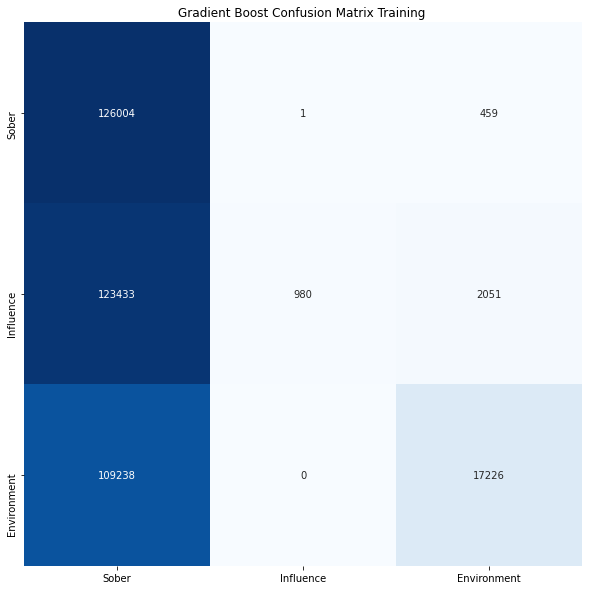

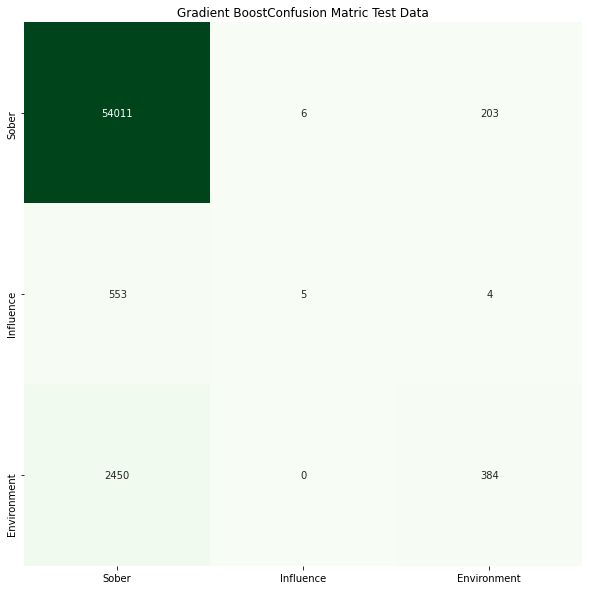

____________________________________________________________


In [0]:
confusion_train_test_report(gb_clf, x_train_resampled, x_test, y_train_resampled, y_test, name = "Gradient Boost")

## Best Features of Each model

In [0]:
# models.remove(bag_clf)
feats = {}
feature_score = (list(rf_clf.feature_importances_))
features = list(x_train.columns)
for num in list(range(len(x_train.columns))):
    feats[features[num]] = round(feature_score[num], 2)


top_feat_rf = {}
for item in sorted(feats.items(), key=lambda x: x[1], reverse=True)[:15]:
    top_feat_rf[item[0]] = item[1]
    

In [0]:
feats1 = {}
feature_score = list(ada_clf.feature_importances_)
features = list(x_train.columns)
for num in list(range(len(x_train.columns))):
    feats1[features[num]] = feature_score[num]


top_feat_ada = {}
for item in sorted(feats1.items(), key=lambda x: x[1], reverse=True)[:15]:
    top_feat_ada[item[0]] = item[1]
    

In [0]:
# models.remove(bag_clf)
feats2 = {}
feature_score = (list(gb_clf.feature_importances_))
features = list(x_train.columns)
for num in list(range(len(x_train.columns))):
    feats2[features[num]] = round(feature_score[num], 2)


top_feat_gb = {}
for item in sorted(feats2.items(), key=lambda x: x[1], reverse=True)[:15]:
    top_feat_gb[item[0]] = item[1]
    

In [0]:
# models.remove(bag_clf)
feats2 = {}
feature_score = (list(xgb_clf.feature_importances_))
features = list(x_train.columns)
for num in list(range(len(x_train.columns))):
    feats2[features[num]] = round(feature_score[num], 2)


top_feat_xgb = {}
for item in sorted(feats2.items(), key=lambda x: x[1], reverse=True)[:15]:
    top_feat_xgb[item[0]] = item[1]
    

In [0]:
tops = [top_12, top_feat_ada, top_feat_rf, top_feat_gb, top_feat_xgb]
mods = ["SelectKBest", 'AdaBoost', 'Random Forest', "GradientBoot", "XGBoost"]

### Plotted Best Features

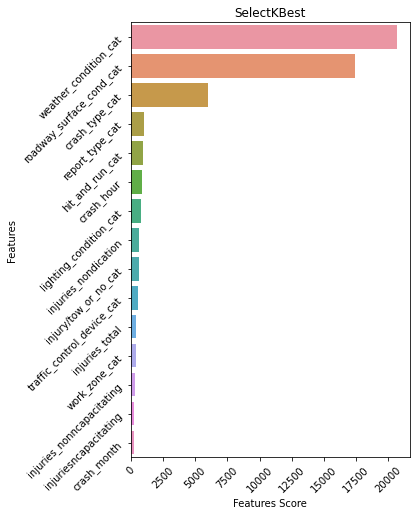

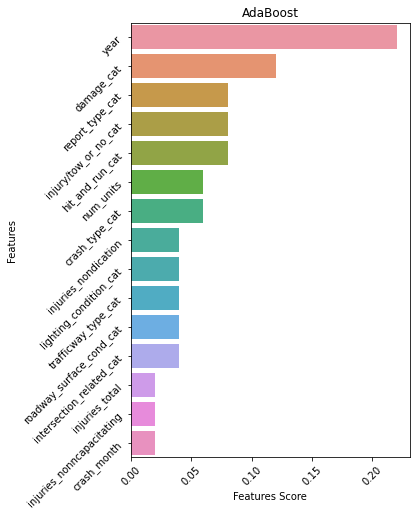

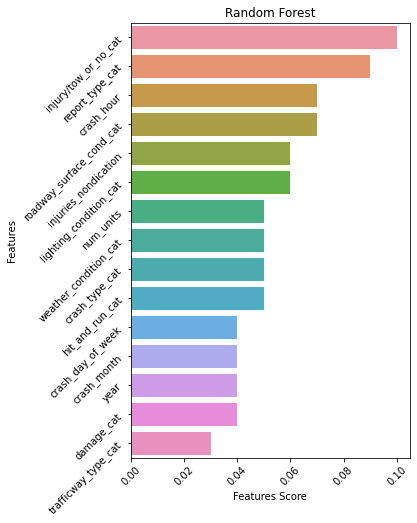

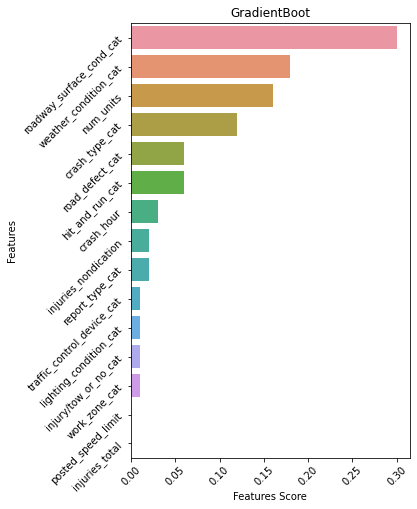

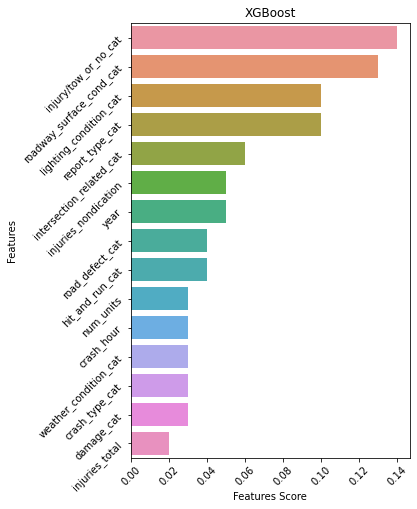

In [0]:
for num in list(range(len(tops))):
  plot_features(tops[num], mods[num])

# Model Dummified (The scores do not increase with dummification; but take longer; SKIP) 

In [0]:
# cat_cols = []
# for col in df.columns:
#   if col.endswith("_cat"):
#     cat_cols.append(col)

In [0]:
# df_norm = df.drop(columns=cat_cols)

In [0]:
# df_norm_dum = pd.get_dummies(df_norm)

In [0]:
# # Create X and y
# y = df_target['target_labels_binned']
# x =  df_norm_dum

# # Split data into training and test sets
# x_train, x_test, y_train, y_test= train_test_split(x, y,
#                                     test_size = .30)

In [0]:
# rf_clf = RandomForestClassifier()
# ada_clf = AdaBoostClassifier()
# gb_clf = GradientBoostingClassifier()  # TOTOALLY CANNOT DO THIS ON MY COMPUTER
# bag_clf = BaggingClassifier()

# models = [rf_clf, ada_clf, bag_clf, gb_clf]

In [0]:
# for model in models:
#     model.fit(x_train, y_train)


In [0]:
# for model in models:
#     train_score = model.score(x_train, y_train)
#     test_score = model.score(x_test, y_test)
#     print(model ,train_score, test_score)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 0.9996057603618078 0.9419605665093029
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 0.9422104198280222 0.9419084976395445
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
             

# Model Perfecting (hyperparameter tuning needed to do in sections)

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [120],
    'max_features': [2],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [0]:
# Fit the grid search to the data
grid_search.fit(x_train_resampled, y_train_resampled)
grid_search.best_params_

     

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  8.8min finished


{'bootstrap': True,
 'max_depth': 120,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [0]:
# random_for = RandomForestClassifier(
#     # bootstrap = True, 
#     # # max_depth= 120,
#      max_features= 'sqrt',
#     # #  min_samples_leaf = 3,
#     #  min_samples_split = 8,
#     #  n_estimators = 300
# )
# random_for.fit(x_train_resampled, y_train_resampled)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train Scores 
--------------------------------------------------
Train Accuracy: 0.9998655743927125
Test Scores 
--------------------------------------------------
Test Accuracy: 0.9406414884754235
Average Accuracy: 0.970253531434068


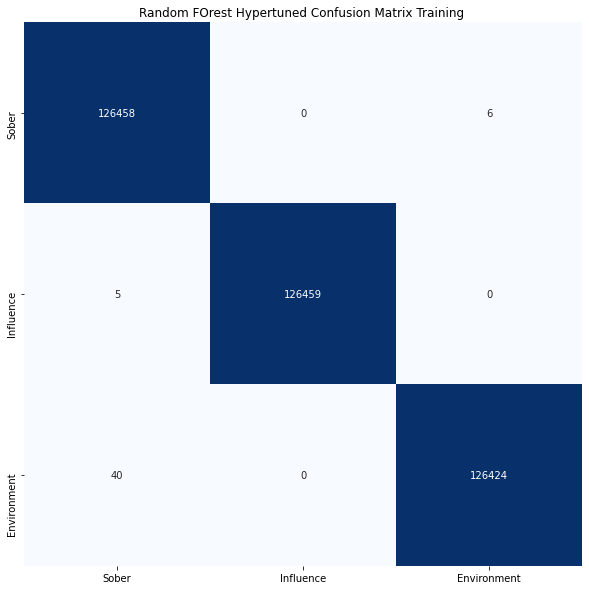

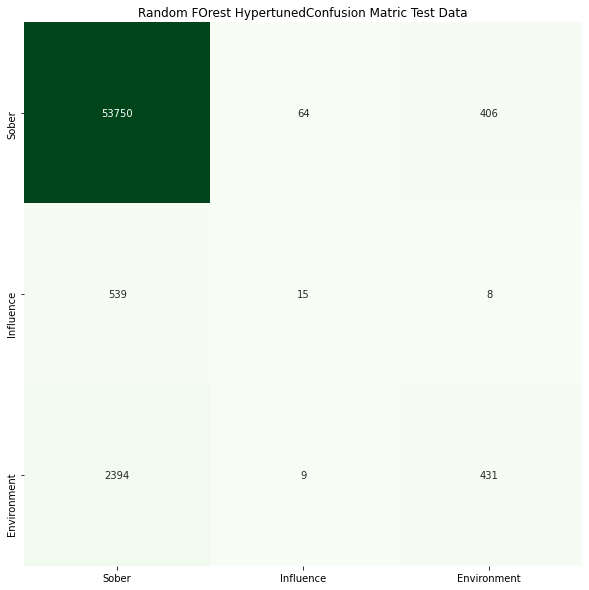

____________________________________________________________


In [0]:
# confusion_train_test_report(random_for, x_train_resampled, x_test, y_train_resampled, y_test, "Random FOrest Hypertuned" )

In [0]:
# ada = AdaBoostClassifier(
#     # bootstrap = True, 
#     # max_depth= 120,
#     # max_features= 'sqrt',
#     # min_samples_leaf = 3,
#     # min_samples_split = 8,
#      n_estimators = 300
# )
# ada.fit(x_train_resampled, y_train_resampled)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=None)

Train Scores 
--------------------------------------------------
Train Accuracy: 0.8854825615721997
Test Scores 
--------------------------------------------------
Test Accuracy: 0.9285441544015551
Average Accuracy: 0.9070133579868774


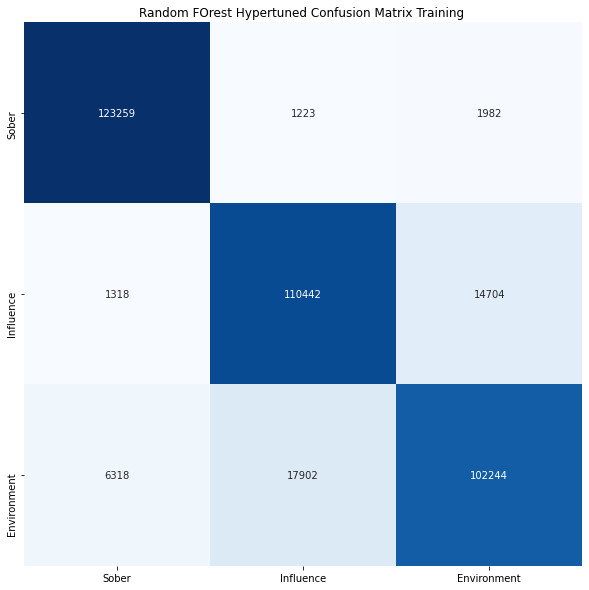

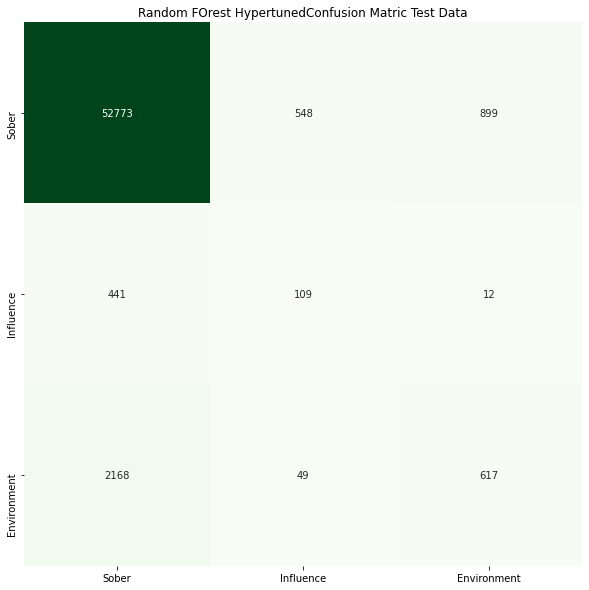

____________________________________________________________


In [0]:
# confusion_train_test_report(ada, x_train_resampled, x_test, y_train_resampled, y_test, "Random FOrest Hypertuned" )

# Model Features EDA 


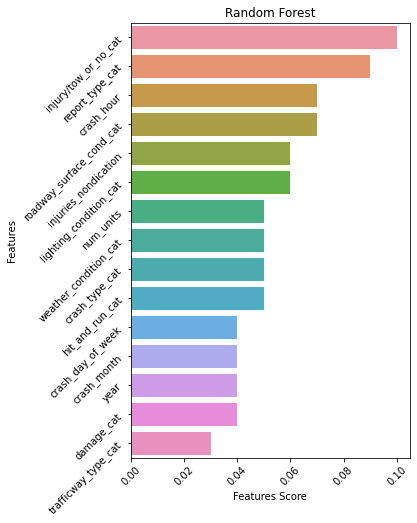

In [0]:
plot_features(top_feat_rf, mods[2])

In [0]:
label_to_names = {0 : "Sober",
1 : "Influenced",
2 : "Enviornment"}

In [0]:
df_target['binned_names'] = df_target['target_labels_binned'].map(label_to_names)

(192052, 50)

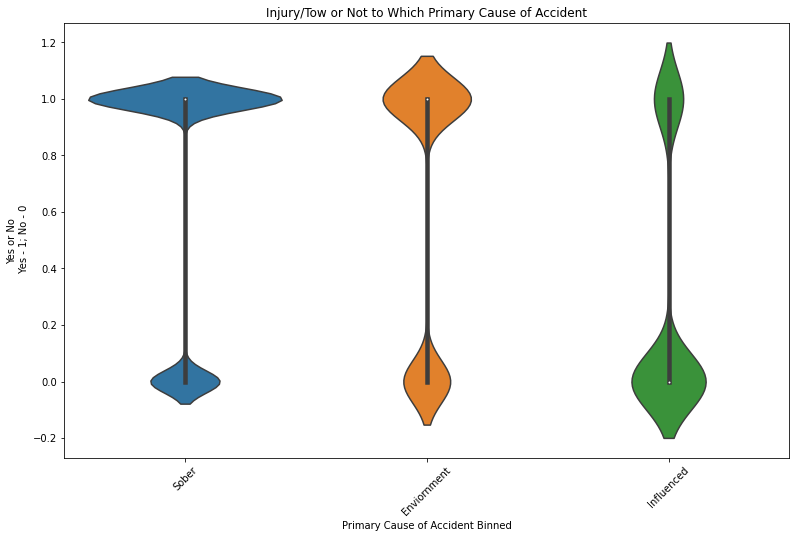

In [0]:
violinplot(df_target['binned_names'] ,df['injury/tow_or_no'], "Injury/Tow or Not to Which Primary Cause of Accident",
           "Primary Cause of Accident Binned", "Yes or No\n Yes - 1; No - 0")

In [0]:
df['report_type'].value_counts()

NOT ON SCENE (DESK REPORT)    105466
ON SCENE                       86586
Name: report_type, dtype: int64

Text(0, 0.5, 'Report Type')

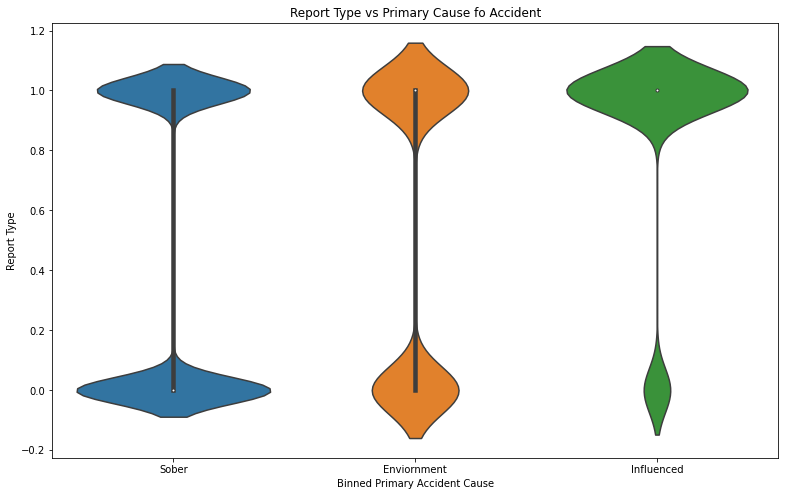

In [0]:
plt.figure(figsize=(13,8))
sns.violinplot(df_target['binned_names'], df['report_type_cat'])
plt.title("Report Type vs Primary Cause fo Accident")
plt.xticks()
plt.xlabel("Binned Primary Accident Cause")
plt.ylabel("Report Type")

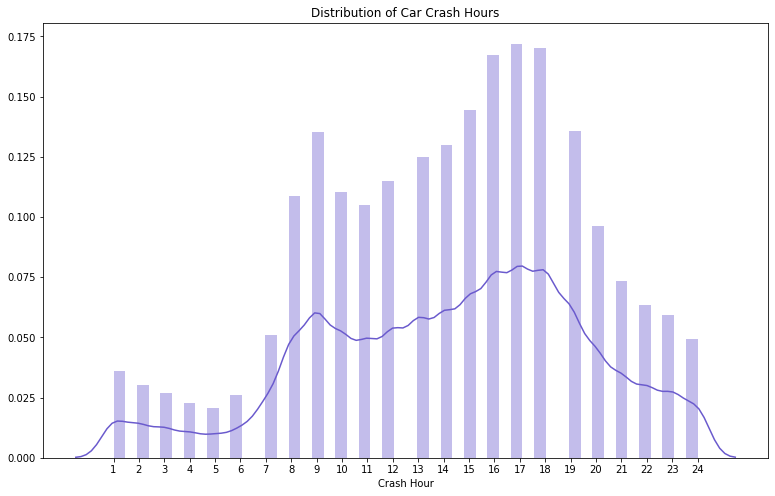

In [0]:
plt.figure(figsize=(13,8))
sns.distplot(df['crash_hour'], color='slateblue')
plt.title("Distribution of Car Crash Hours")
plt.xticks(ticks=(range(0,24)), labels=list((range(1,25))))
plt.xlabel("Crash Hour")
plt.show()

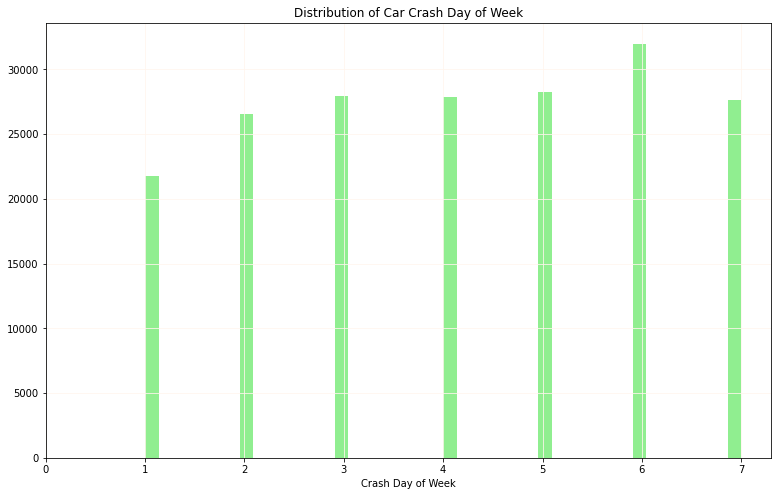

In [0]:
plt.figure(figsize=(13,8))
plt.hist(x = df['crash_day_of_week'], color='lightgreen', bins="auto")
plt.grid(True, linestyle='-', which="both", color='seashell')
plt.title("Distribution of Car Crash Day of Week")
plt.xticks(ticks=(range(0,8)), labels=list((range(0,8))))
plt.xlabel("Crash Day of Week")
plt.show()

In [0]:
road_surface = ["DRY", "WET", "SNOW OR SLUSH", "ICE", "SAND, MUD, DIRT"]

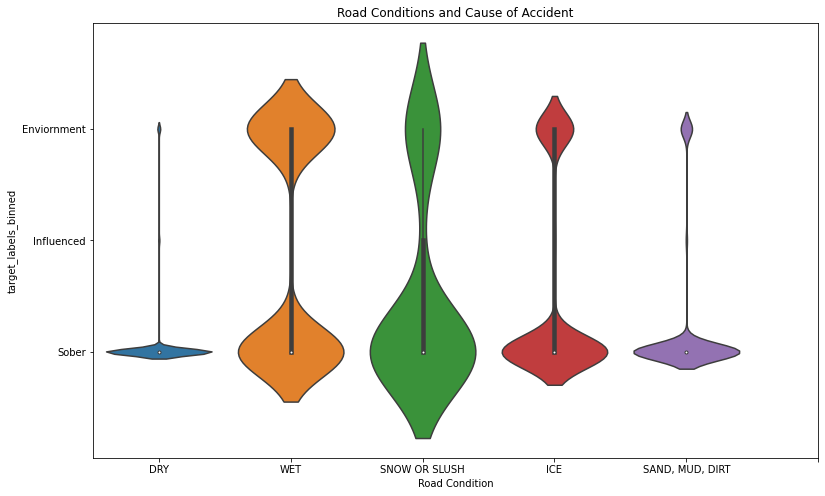

In [0]:
plt.figure(figsize=(13,8))
sns.violinplot(df['roadway_surface_cond_cat'], df_target['target_labels_binned'], scale_hue=True, scale="width" )
plt.xticks(ticks=range(0,6), labels=road_surface)
plt.xlabel("Road Condition")
plt.yticks(ticks=range(0,3,), labels=label)
plt.title("Road Conditions and Cause of Accident")
plt.show()

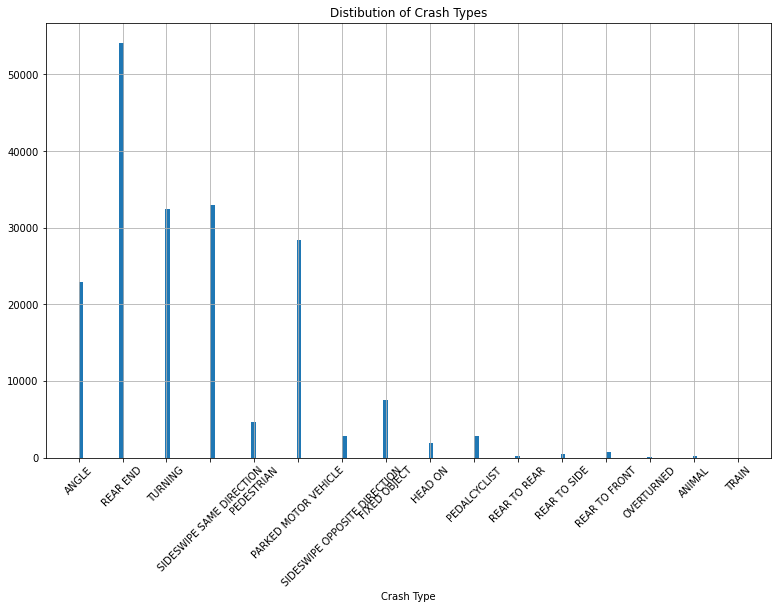

In [0]:
plt.figure(figsize=(13,8))
plt.hist(df['crash_type'], bins='auto',)
plt.grid(True, linestyle='-')
plt.title("Distibution of Crash Types")
plt.xlabel("Crash Type")
plt.xticks(rotation=45)
plt.show()

In [0]:
weather = ['Clear','Rain','Snow', 'Cloudy/Overcast', 'Fog/Smoke/Haze', 'Sleet/Hail', 'Freezing Raing/Drizzle', 'Severe Cross Wind Gate', 'Blowing Snow']

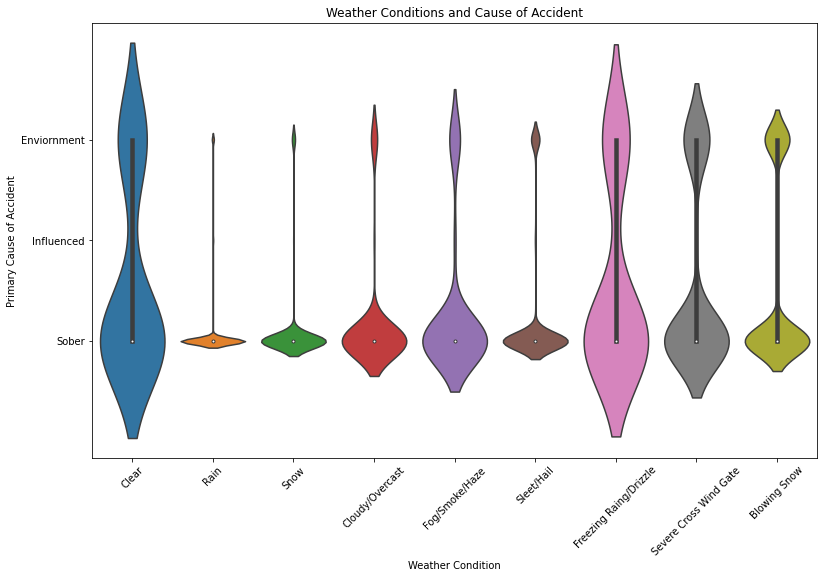

In [0]:
plt.figure(figsize=(13,8))
sns.violinplot(df['weather_condition_cat'], df_target['target_labels_binned'], scale_hue=True, scale="width" )
plt.yticks(range(0,3), labels=label)
plt.xlabel("Weather Condition")
plt.xticks(ticks=range(len(weather),), labels=weather, rotation=45)
plt.ylabel("Primary Cause of Accident")
plt.title("Weather Conditions and Cause of Accident")
plt.show()